# init

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tridiagonal(sub,diag,sup,rhs):   #function definition
    """
    Solves a tridiagonal system of equations using Gauss Elimination method
    
    tridiagonal(sub,diag,sup,rhs)
    Solves a tridiagonal system of equations Ax=b to obtain x using Gauss Elimination method
    The coefficient matrix A is defined based on its diagonal, sub-diagonal (below diaginal) 
    and super-diagonal (above diaginal) vectors. 
    All input arguments sub,diag,sup and rhs as must have the same length. 
    The output vector x has the same length as these vectors.
    Input:
        sub: sub-diagonal vector of the matrix. The first element of this vector must be zero
        diag: diagonal vector of the matrix
        sub: super-diagonal vector of the matrix. The last element of this vector must be zero
        rhs: the right-hand side vector
    Output
        x: the unknown vector
    """
    
    n = diag.shape[0] # length of vectors
    # check if vector lengths are equal, if not show an error message
    assert sub.shape[0] == n and  \
           sup.shape[0] == n and  \
           rhs.shape[0] == n      \
           , "all vector lengths must be equal"
    # check if the 1st element of sub ector sf zero, if not show an error message       
    assert sub[0] == 0 , "the first element of sub must be zero"
    # check if the last element of sup ector is zero, if not show an error message       
    assert sup[-1] == 0 , "the last element of sup must be zero"  
    # make local copies of vectors so that the original copies are not over-written
    sub1 = sub.copy()
    diag1 = diag.copy()
    sup1 = sup.copy()
    rhs1 = rhs.copy()
    x = np.zeros(n)   #initiate x vector of size n filled with zeros
    # forward elimination
    for i in range(1,n):
        fac = - sub1[i] / diag1[i-1]  #Factor f for all subsequent rows 
        diag1[i] = diag1[i] + fac * sup1[i-1] #using pivot element to eliminate the sub vector
        rhs1[i] = rhs1[i] + fac * rhs1[i-1]   #using pivot element to modify the rhs vector
    # at this stage an upper triangle matrix results    
    # back substitution
    x[n-1] = rhs1[n-1] / diag1[n-1] #calculate x on the last row
    for i in range(n-2,-1,-1):    #calculate x for row i from n-2 down to 0
        x[i] = (rhs1[i] - sup1[i] * x[i+1]) / diag1[i]     
    return x   #returns x

# Boundary Value Problems: Finite-Difference Method

In finite difference method we substitute the derivaives in the ODE in terms of finite difference approximations and then solve the resulting algebraic system of equations as shown in the examples below.



## Example 1: Finite-Difference Method with Dirichlet boundary condition
Solve $\frac{d^2T}{dx^2}+0.05(T_\infty-T)=0$ where $T_\infty=200\,K$ using finite difference method. This equation governs the heat transfer in a rod with length $L=10\,m$. The temperature at $x=0$ is $T=300\,K$ and at $x=L$ it is $T=400\,K$ which are Dirichlet boundary conditions.


We use `n=6` nodes along the rod which results in these nodes:  

$x_1=0$ | $x_2=h$ | $x_3=2h$ | $x_4=3h$ | $x_5=4h$ | $x_6=5h=L$
--- | --- | --- | --- | --- | ---
$T_1=300K$|$T_2$|$T_3$|$T_4$|$T_5$|$T_6=400K$

where $h=L/(n-1)$ is the step size.


We approximate $\frac{d^2T}{dx^2} \approx \frac{T_{i-1}-2T_{i}+T_{i+1}}{h^2}$ which is of 2nd order accuracy. After substituting into the ODE and simplifying we obtain the finite difference equation:
$-T_{i-1}+2.2T_{i}-T_{i+1}=40$ for $i=2,\ldots,5$. 

By substituting $i=2,\ldots,5$ in this equation we get the following tridiagonal system of equations for the unknown temperatures $T_2, \ldots, T_5$ which can be solved using the tridiagonal matrix solver. 

$$
\begin{bmatrix}
2.2 & -1 & 0 & 0\\
-1 & 2.2 & -1 & 0 \\
0 & -1 & 2.2 & -1 \\
0 &0 &-1&2.2
\end{bmatrix}\begin{bmatrix}
T_2 \\
T_3 \\
T_4 \\
T_5 
\end{bmatrix}=\begin{bmatrix}
340 \\
40 \\
40 \\
440 
\end{bmatrix}
$$
The solution is implemented in the code below.

T [k] at the internal nodes = 
 [283.26603134 283.18526894 299.74156033 336.24616379]
T [k] at all nodes = 
 [300.         283.26603134 283.18526894 299.74156033 336.24616379
 400.        ]

Solution with n= 6


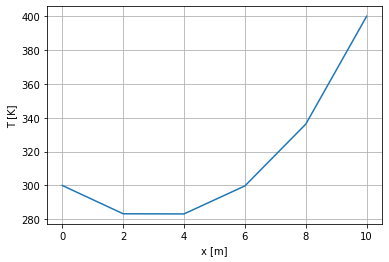

In [ ]:
L = 10. # length of the rod
convHTcoeff = 0.05 
Tinf = 200. #K  : ambient temperature
T0 = 300.   #K  : Boundary condition at x=0
TL = 400.   #K  : Boundary condition at x=L

n = 6   # number of nodes
h = L / float(n -1) # step size

# init variables
x = np.zeros(n, float)
T = np.zeros(n, float)

x = np.array([float(i-1) * h for i in range(1,n+1)])  #x location of the nodes

m = n - 2  #size of the matrix (excluding the 1st and last nodes)

diag = np.zeros(m , float)
subDiag = np.zeros(m, float)
supDiag = np.zeros(m, float)
rhs = np.zeros(m, float)
# Setting up the vectors for the tridiagonal system
diag[:] = 2. + convHTcoeff * h**2  #diagonal elements of the coefficient matrix
subDiag[1:]  = -1.                 #sub-diagonal elements of the coefficient matrix  for i= 2 to m (the 1st element must be zero)
supDiag[:-1] = -1.                 #super-diagonal elements of the coefficient matrix  for i= 1 to m-1 (the last element must be zero)
rhs[1:-1] = convHTcoeff * Tinf * h**2  #the RHS elements for i=2 to m-1
rhs[0] = convHTcoeff * Tinf * h**2 + T0  #the first element of RHS includes T0
rhs[-1] = convHTcoeff * Tinf * h**2 + TL #the last element of RHS includes TL
#Solving the system using the tridiagonal matrix solver
Tinternal = tridiagonal(subDiag,diag,supDiag,rhs)
print('T [k] at the internal nodes = \n', Tinternal)
# Setting up T for all nodes including the first and the last nodes
T[1:-1] = Tinternal # placing the internal nodes inside T array excluding the first and the last nodes
T[0] = T0  # the 1st node the the BC at x=0
T[-1] = TL # the lastnode the the BC at x=L
print('T [k] at all nodes = \n', T)
#Plotting
print()
print('Solution with n=', n)
plt.plot(x,T)
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.grid(True)
plt.show();

Checking the boundary conditions: it is evidenced that the temperature distribution satisfies the boundary conditions correctly. 

Note how we seriously avoided manually hard-coding values into the equations and particularly, the vectors which makes repeating the calculations with different parameter values very tedious. As an exercise, you may easily change the number of nodes `n` in the code above to obtain a smoother/accurate solution without any further effort. Remember that we are using is a 2nd order accurate finite difference scheme $\cal{O}(h^2)$ and the truncation error decreases as the step size $h$ squared. As `n` increases, `h=L/(n-1)` decreases. Therefore, by using more node we obtain a more accurate solution.

## Example 2: Finite-Difference Method with Neumann boundary condition
Solve $\frac{d^2T}{dx^2}+0.05(T_\infty-T)=0$ where $T_\infty=200\,K$ using finite difference method. This equation governs the heat transfer in a rod with length $L=10\,m$. The temperature at $x=L$ it is $T=400\,K$ which are Dirichlet boundary condition. At $x=0$ we have $dT/dx=0$ which is a Neumann boundary condition. 


We use `n=6` nodes along the rod which results in these nodes: 
 
$x_1=0$ | $x_2=h$ | $x_3=2h$ | $x_4=3h$ | $x_5=4h$ | $x_6=5h=L$
--- | --- | --- | --- | --- | ---
$T_1$|$T_2$|$T_3$|$T_4$|$T_5$|$T_6=400K$

where $h=L/(n-1)$ is the step size.


We approximate $\frac{d^2T}{dx^2} \approx \frac{T_{i-1}-2T_{i}+T_{i+1}}{h^2}$ which is of 2nd order accuracy. After substituting into the ODE and simplifying we obtain the finite difference equation:
$-T_{i-1}+2.2T_{i}-T_{i+1}=40$ for $i=2,\ldots,5$. 

Using a *ghost node* $T_0$ (illustrated below) along with a 2nd order accurate central difference to approximate $\frac{dT}{dx}|_{i=1} \approx \frac{T_2-T_0}{2h}$ we obtain the finite difference equation for node $i=1$: 

$2.2T_{1}-2T_{2}=40-2h\frac{dT}{dx}(0)$ 

in which $\frac{dT}{dx}(0)=0$ according to the Neumann boundary condition.

ghost | $x_1=0$ | $x_2=h$
--- | --- | --- 
$T_0$ |$T_1$|$T_2$

From finite difference equations for nodes $i=1,\ldots,5$ we obtain the following tridiagonal system of equations for the unknown temperatures $T_1, \ldots, T_5$ which can be solved using the tridiagonal matrix solver. 

$$
\begin{bmatrix}
2.2 & -2 & 0 & 0 &0\\
-1 & 2.2 & -1 & 0 & 0\\
0 & -1 & 2.2 & -1 & 0 \\
0 & 0 & -1 & 2.2 & -1\\
0 &0 & 0 & -1&2.2
\end{bmatrix}\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5 
\end{bmatrix}=\begin{bmatrix}
40 \\
40 \\
40 \\
40 \\
440 
\end{bmatrix}
$$
The solution is implemented in the code below.

T [k] at the internal nodes = 
 [243.02777873 247.33055661 261.0994458  287.08822416 330.49464734]
T [k] at all nodes = 
 [243.02777873 247.33055661 261.0994458  287.08822416 330.49464734
 400.        ]

Solution with n= 6


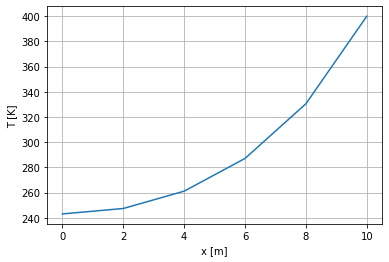

In [ ]:
L = 10. # length of the rod
convHTcoeff = 0.05 
Tinf = 200. #K  : ambient temperature
dTdx0 = 0.   # dT/dx = 0 : Boundary condition at x=0
TL = 400.    #K          : Boundary condition at x=L

n = 6   # number of nodes
h = L / float(n -1) # step size

# init variables
x = np.zeros(n, float)
T = np.zeros(n, float)

x = np.array([float(i-1) * h for i in range(1,n+1)])  #x location of the nodes

m = n - 1  #size of the matrix (excluding the last node)

diag = np.zeros(m , float)
subDiag = np.zeros(m, float)
supDiag = np.zeros(m, float)
rhs = np.zeros(m, float)
# Setting up the vectors for the tridiagonal system
diag[:] = 2. + convHTcoeff * h**2   #diagonal elements of the coefficient matrix
subDiag[1:]  = -1.                  #sub-diagonal elements of the coefficient matrix  for i= 2 to m (the 1st element must be zero)
supDiag[1:-1] = -1.                 #super-diagonal elements of the coefficient matrix  for i= 2 to m-1 (the last element must be zero)
supDiag[0] = -2.                    #the first element of super-diagonal vector is set according to the Neumann BC at x=0
rhs[1:-1] = convHTcoeff * Tinf * h**2  #the RHS elements for i=2 to m-1
rhs[0] = convHTcoeff * Tinf * h**2 - 2. * h * dTdx0  #the first element of RHS gets modified due to the Neumann BC at x=0
rhs[-1] = convHTcoeff * Tinf * h**2 + TL #the last element of RHS includes TL
#Solving the system using the tridiagonal matrix solver
Tinternal = tridiagonal(subDiag,diag,supDiag,rhs)
print('T [k] at the internal nodes = \n', Tinternal)
# Setting up T for all nodes including the first and the last nodes
T[0:-1] = Tinternal # placing the internal nodes inside T array excluding the the last node
T[-1] = TL # the last node the the BC at x=L
print('T [k] at all nodes = \n', T)
#Plotting
print()
print('Solution with n=', n)
plt.plot(x,T)
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.grid(True)
plt.show();

Checking the boundary conditions: it is shown that the temperature distribution satisfies the boundary conditions correctly. The temperature gradient is zero (roughly, since `n=6`) and the end node has a value of $400\,K$. Again, you may easily increase the `n` value to obtain a more accurate solution.

# Exercise

Use finite difference method (with 2nd order accurate central finite-difference) to solve $7{d^2y \over dx^2} - 2{dy \over dx}-y+x=0$ with boundary conditions $y(0)=5$ and $y(20)=8$ on $n=11$ nodes. Compare the results with the shooting method.